# Heart Disease

Data source: https://www.kaggle.com/johnsmith88/heart-disease-dataset

Attempting to 
 - build a classification model to predict if a patient has heart disease
 - determine which machine learning algorithm models the data best
 - determine which feature in the data is most important in predicting heart disease

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
%matplotlib inline

In [340]:
data = pd.read_csv("data\heart.csv")

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [342]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [343]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [344]:
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

In [345]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Exploratory Data Analysis

In [346]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,54.650246,0.660099,1.009852,130.812808,248.448276,0.128079,0.527094,149.655172,0.330049,1.033005,1.403941,0.635468,2.330049
std,9.019826,0.474846,1.043557,17.071615,55.012339,0.335004,0.529342,22.672426,0.471393,1.101908,0.616910,0.920139,0.600687
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.500000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000


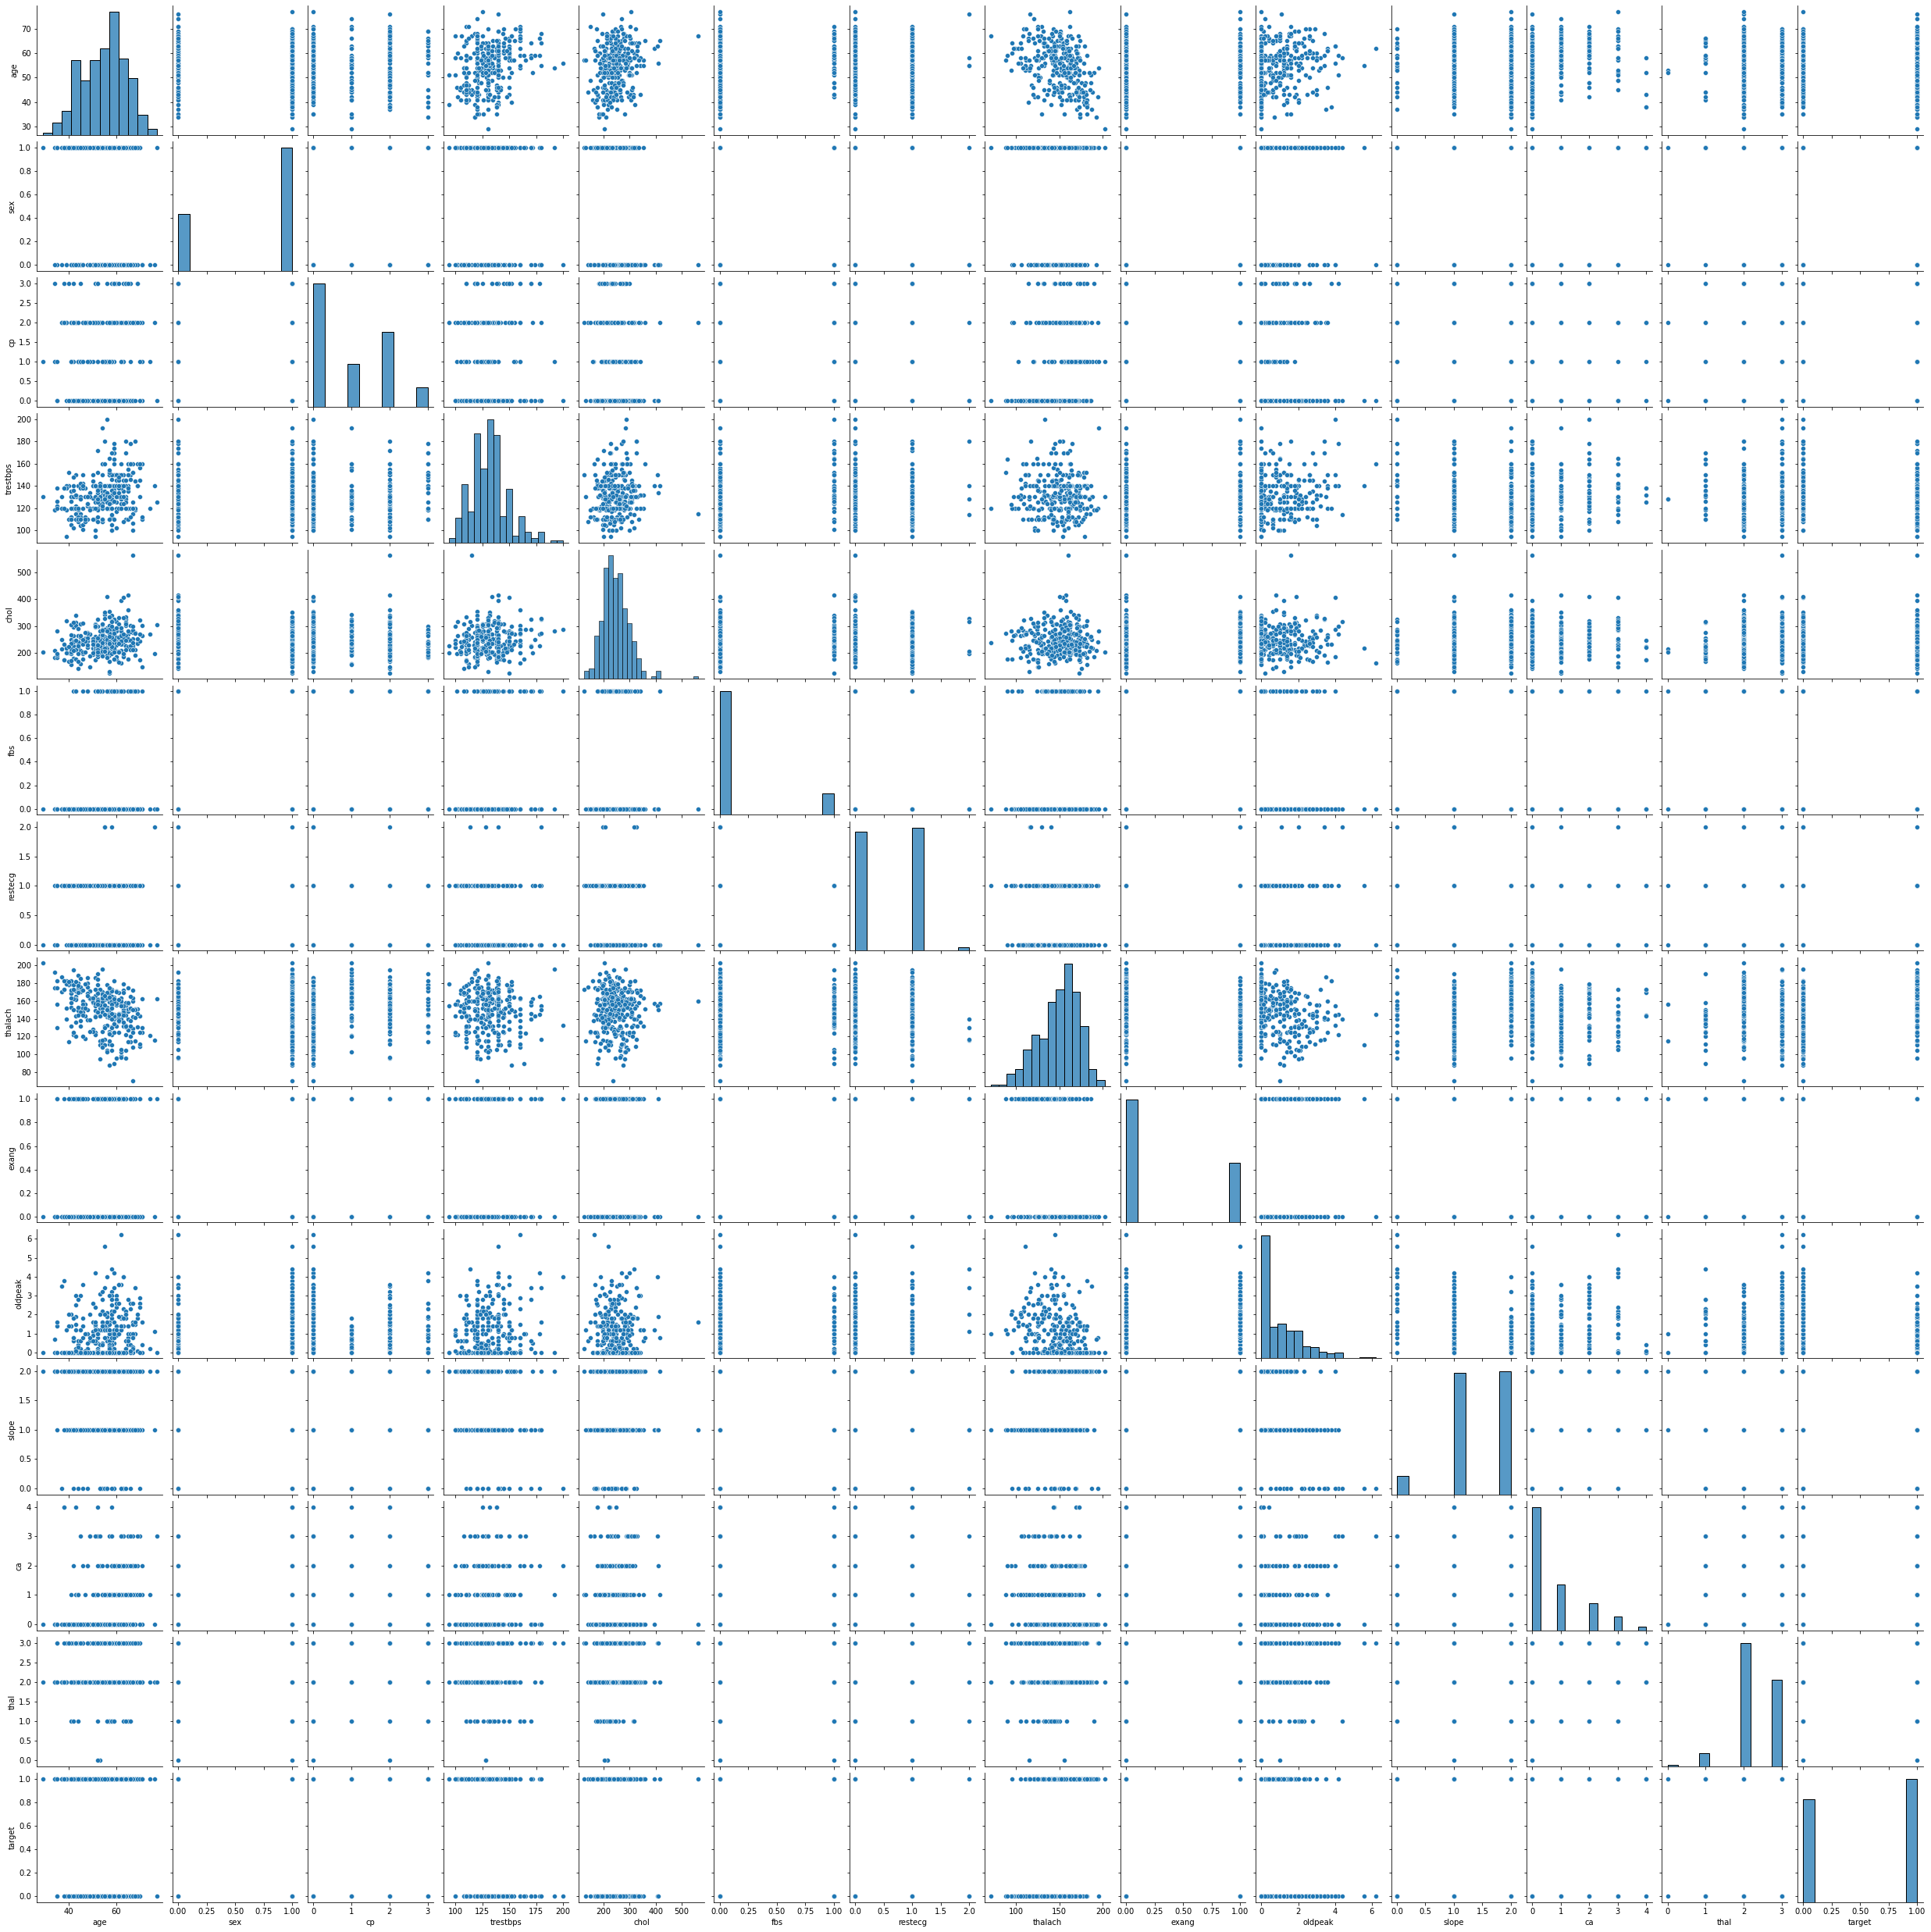

In [347]:
sns.pairplot(data)

In [348]:
full_train = pd.concat([X_train,y_train],axis=1)

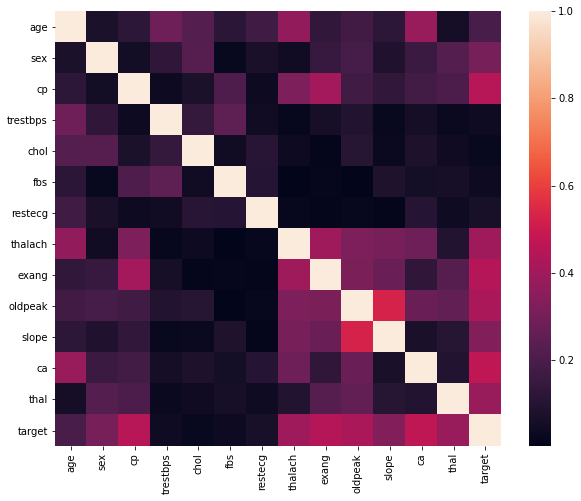

In [349]:
corr_matrix = full_train.corr()
plt.figure(figsize = (10,8))
ax = sns.heatmap(abs(corr_matrix))

In [350]:
# least correlated seem to be trestbps, chol, fbs
abs(corr_matrix['target'])

age         0.195826
sex         0.304756
cp          0.454443
trestbps    0.039381
chol        0.024446
fbs         0.038252
restecg     0.067287
thalach     0.393463
exang       0.447252
oldpeak     0.423966
slope       0.333145
ca          0.472928
thal        0.383917
target      1.000000
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

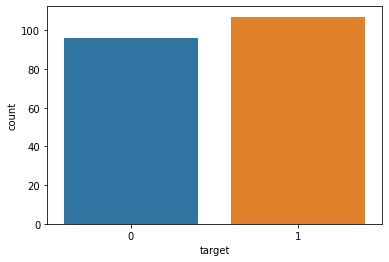

In [351]:
# fairly even counts for each catagory
sns.countplot(data=full_train,x='target')

In [352]:
large_features = {'age','trestbps','chol','thalach','oldpeak'}
features = list(set(X_train.columns) - large_features)
large_features = list(large_features)

<ipython-input-353-dc46b9aea301>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


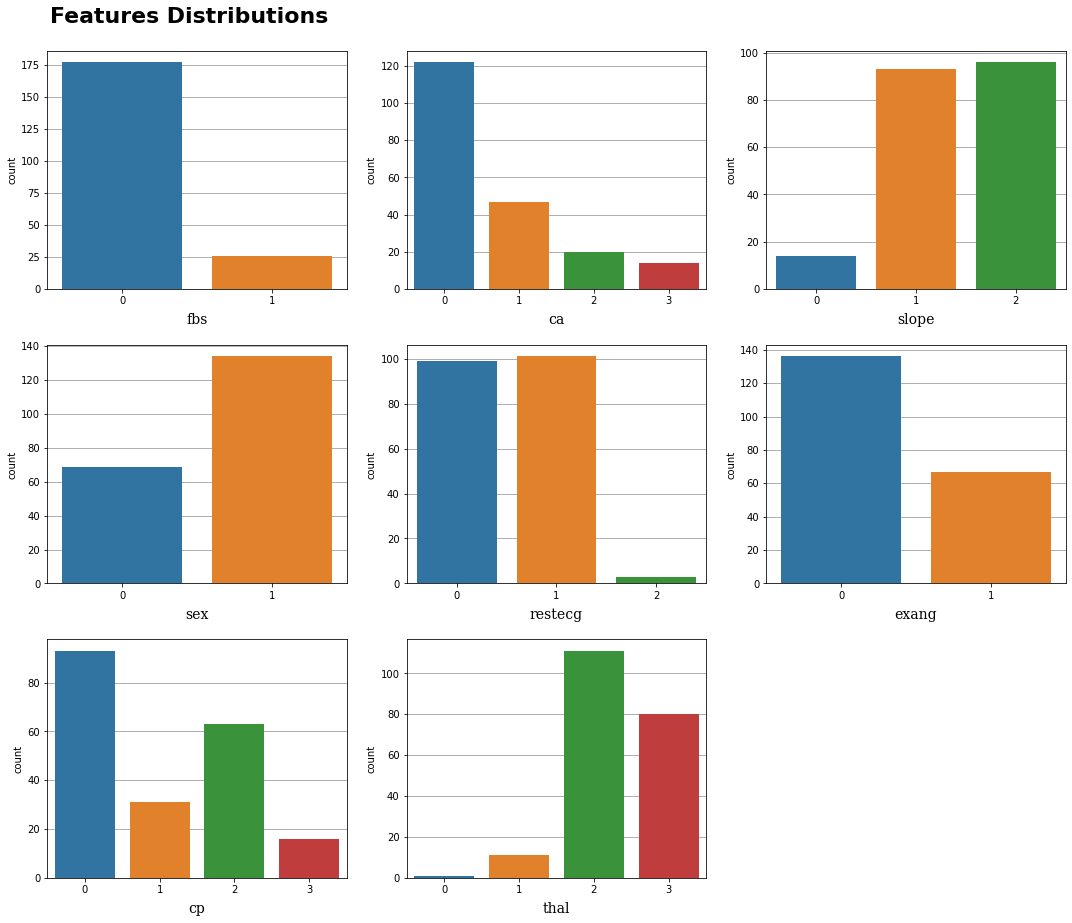

In [353]:
rows = 5
cols = 3
fig = plt.figure(figsize=(15, 20))
for index, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, index+1)
    ax.grid(axis="y", linewidth=1, zorder=0)
    sns.countplot(x=feature, data=full_train, alpha=1, linewidth=1.5, zorder=2)
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)

fig.text(x=0.05, y=1.01, s="Features Distributions", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

<ipython-input-354-cf7b6193c4b6>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


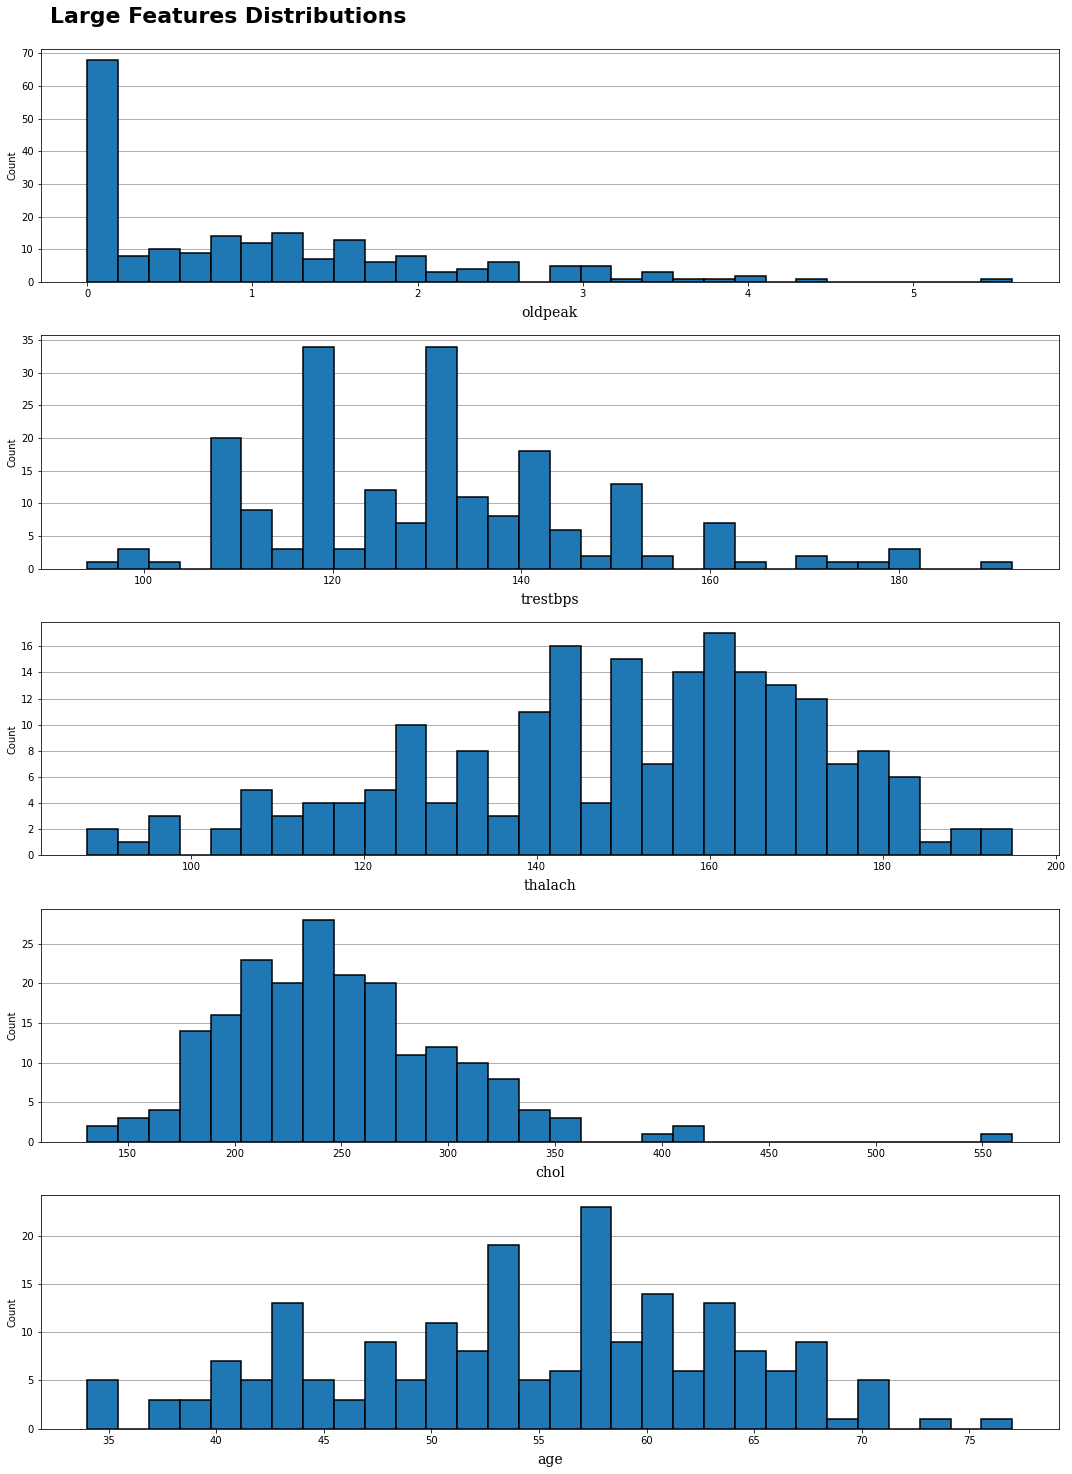

In [354]:
rows = 5
cols = 1
fig = plt.figure(figsize=(15, 20))
for index, feature in enumerate(large_features):
    ax = fig.add_subplot(rows, cols, index+1)
    ax.grid(axis="y", linewidth=1, zorder=0)
    sns.histplot(x=feature, data=full_train, alpha=1, linewidth=1.5, zorder=2,bins=30)
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    ax.locator_params(axis='x', nbins=10)

fig.text(x=0.05, y=1.01, s="Large Features Distributions", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

<ipython-input-355-df763fe8bb6e>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


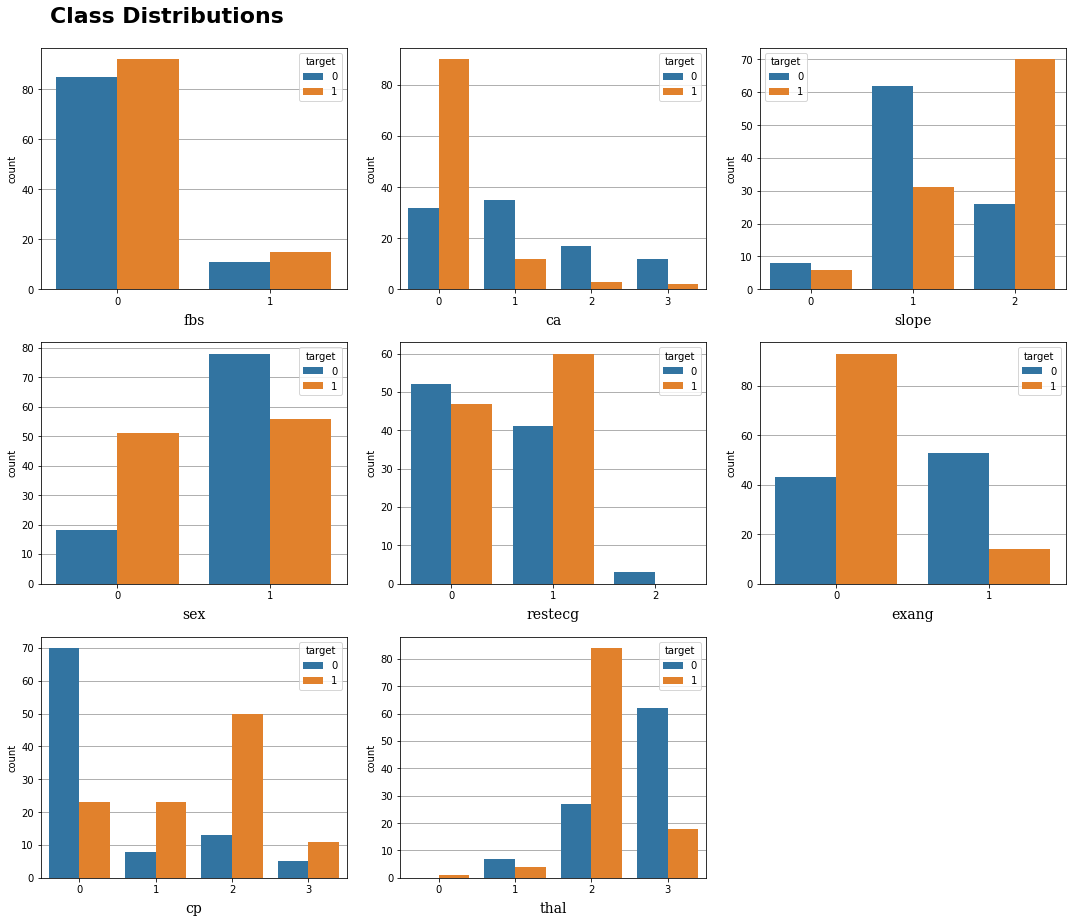

In [355]:
rows = 5
cols = 3
fig = plt.figure(figsize=(15, 20))
for index, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, index+1)
    ax.grid(axis="y", linewidth=1, zorder=0)
    sns.countplot(x=feature, data=full_train, alpha=1, linewidth=1.5, zorder=2,hue='target')
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)

fig.text(x=0.05, y=1.01, s="Class Distributions", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

<ipython-input-356-049a20e99ef1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


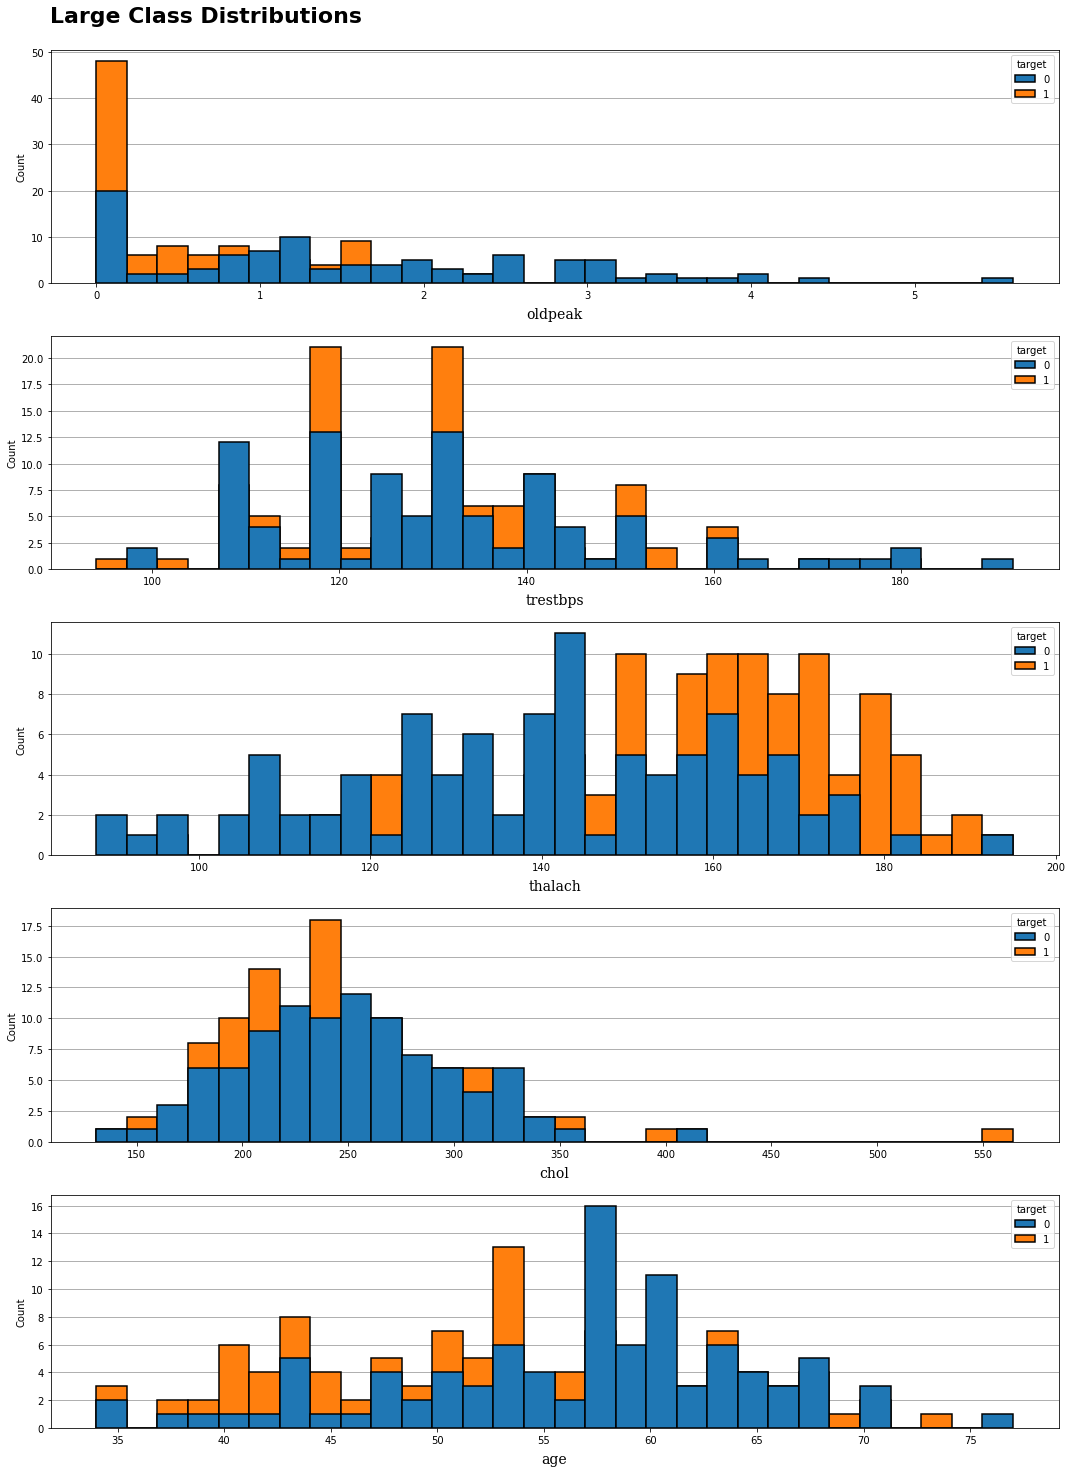

In [356]:
rows = 5
cols = 1
fig = plt.figure(figsize=(15, 20))
for index, feature in enumerate(large_features):
    ax = fig.add_subplot(rows, cols, index+1)
    ax.grid(axis="y", linewidth=1, zorder=0)
    sns.histplot(x=feature, data=full_train, alpha=1, linewidth=1.5, zorder=2,hue='target',bins=30)
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    ax.locator_params(axis='x', nbins=10)

fig.text(x=0.05, y=1.01, s="Large Class Distributions", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

# Inital Models

In [357]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [358]:
log_reg = LogisticRegression()
sgd = SGDClassifier()
lin_svm = LinearSVC()
svm = SVC()
dec_tree = DecisionTreeClassifier(max_depth=3)
ran_for = RandomForestClassifier()

models = [log_reg,sgd,lin_svm,svm,dec_tree,ran_for]

In [359]:
prec_recall = pd.DataFrame(columns = ["model","precision","recall"])
for model in models:
    row = []
    row.append(model)
    row.append(np.mean(cross_val_score(model,X_train,y_train,cv=5,scoring='precision')))
    row.append(np.mean(cross_val_score(model,X_train,y_train,cv=5,scoring='recall')))
    prec_recall.loc[len(prec_recall.index)] = row

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

From the context of the data, we should prioritise minimising the amount of people our model misclassifies as 0 (better to be careful). So we minimise False negatives. So we prioritise recall over precision

In [360]:
prec_recall

,model,precision,recall
0,LogisticRegression(),0.848509,0.916017
1,SGDClassifier(),0.543333,0.348052
2,LinearSVC(),0.703111,0.934199
3,SVC(),0.603482,0.869264
4,DecisionTreeClassifier(max_depth=3),0.746649,0.906061
5,RandomForestClassifier(),0.827257,0.831602


The best performing models with very little preprocessing and fine-tuning seem to be Logistic Regression, Decision tree and Random forrest. This is probably because we have yet to scale the data for the SVM's. However, most of them arent converging yet.

# Data Preprocessing and Scaling

Now we will one-hot encode catagorical features and scale the numerical features.

In [361]:
# one-hot encoding for catagorical features that arent already boolean
X_train_proc = pd.get_dummies(X_train,columns=['restecg','thal','slope','cp'],drop_first=False)

In [362]:
from sklearn.preprocessing import MinMaxScaler

In [363]:
# using a min max scaler so that numerical features are scaled from 0 to one
# this way they are more similar to the boolean features
scaler = MinMaxScaler()
X_train_proc[['age','trestbps','chol','thalach','oldpeak','ca']] = scaler.fit_transform(X_train[['age','trestbps','chol','thalach','oldpeak','ca']])

In [364]:
new_prec_recall = pd.DataFrame(columns = ["model","new_precision","new_recall"])
for model in models:
    row = []
    row.append(model)
    row.append(np.mean(cross_val_score(model,X_train_proc,y_train,cv=5,scoring='precision')))
    row.append(np.mean(cross_val_score(model,X_train_proc,y_train,cv=5,scoring='recall')))
    new_prec_recall.loc[len(new_prec_recall.index)] = row

new_prec_recall['precision'] = prec_recall['precision']
new_prec_recall['recall'] = prec_recall['recall']
new_prec_recall['diff_precision'] = new_prec_recall['new_precision'] - prec_recall['precision']
new_prec_recall['diff_recall'] = new_prec_recall['new_recall'] - prec_recall['recall']

In [365]:
new_prec_recall

,model,new_precision,new_recall,precision,recall,diff_precision,diff_recall
0,LogisticRegression(),0.830258,0.859740,0.848509,0.916017,-0.018251,-0.056277
1,SGDClassifier(),0.809702,0.805628,0.543333,0.348052,0.266369,0.457576
2,LinearSVC(),0.835132,0.887879,0.703111,0.934199,0.132022,-0.046320
3,SVC(),0.849596,0.850649,0.603482,0.869264,0.246113,-0.018615
4,DecisionTreeClassifier(max_depth=3),0.749030,0.915584,0.746649,0.906061,0.002381,0.009524
5,RandomForestClassifier(),0.838051,0.822078,0.827257,0.831602,0.010794,-0.009524


The data pre-processing has improved the precision of most models, most notably the SGD Classifier and Support Vector Machine Classifier. For most models, the recall error is only slightly different, with the exception of the SGD Classifier which is vastly improved as a result of the processing.

The Logistic Regression model seems to work better on untransformed data.

# Model Fine-Tuning

Model 0 - Logistic Regression

In [366]:
from sklearn.model_selection import GridSearchCV

In [367]:
log_reg = LogisticRegression(max_iter=350)

In [368]:
log_reg_grid = [
    {'penalty':["none"]},
    {'solver':["liblinear"],'penalty':["l1", "l2"],'C':[0.2,0.5,0.7,1,2,3]},
    {'solver':["saga"],'penalty':["elasticnet"],'C':[0.2,0.3,0.4,0.5,0.6],'l1_ratio':[0.7,0.75,0.8,0.85]},
]

log_reg_GS = GridSearchCV(log_reg, log_reg_grid,cv=20,return_train_score=True,scoring="f1")
log_reg_GS.fit(X_train_proc,y_train)

GridSearchCV(cv=20, estimator=LogisticRegression(max_iter=350),
             param_grid=[{'penalty': ['none']},
                         {'C': [0.2, 0.5, 0.7, 1, 2, 3],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [0.2, 0.3, 0.4, 0.5, 0.6],
                          'l1_ratio': [0.7, 0.75, 0.8, 0.85],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             return_train_score=True, scoring='f1')

In [369]:
log_reg_GS.best_estimator_

LogisticRegression(C=0.3, l1_ratio=0.8, max_iter=350, penalty='elasticnet',
                   solver='saga')

In [370]:
from sklearn.model_selection import cross_val_predict

In [371]:
final_log_reg = log_reg_GS.best_estimator_
final_log_reg_pred = cross_val_predict(final_log_reg,X_train_proc,y_train,cv=5)

In [372]:
from sklearn.metrics import confusion_matrix, classification_report

In [373]:
final_log_reg.classes_

array([0, 1], dtype=int64)

In [374]:
confusion_matrix(y_train,final_log_reg_pred)

array([[75, 21],
       [15, 92]], dtype=int64)

In [375]:
print(classification_report(y_train,final_log_reg_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        96
           1       0.81      0.86      0.84       107

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



If we aim for a 90% recall rate, we can select the classification threshold that will produce this recall.

In [376]:
log_reg_scores = cross_val_predict(final_log_reg,X_train_proc,y_train,cv=5,method="decision_function")

In [377]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

In [378]:
log_reg_precisions, log_reg_recalls, log_reg_thresholds = precision_recall_curve(y_train,log_reg_scores)
log_reg_threshold_90_recall = log_reg_thresholds[np.argmax(log_reg_recalls <= 0.91)]
final_log_reg_pred_90 = log_reg_scores >= log_reg_threshold_90_recall

In [379]:
precision_score(y_train,final_log_reg_pred_90)

0.782258064516129

In [380]:
recall_score(y_train,final_log_reg_pred_90)

0.9065420560747663

In [381]:
confusion_matrix(y_train,final_log_reg_pred_90)

array([[69, 27],
       [10, 97]], dtype=int64)

In [382]:
print(classification_report(y_train,final_log_reg_pred_90))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        96
           1       0.78      0.91      0.84       107

    accuracy                           0.82       203
   macro avg       0.83      0.81      0.81       203
weighted avg       0.83      0.82      0.82       203



Model 1 - Stochastic Gradient Descent Classifier

In [383]:
sgd = SGDClassifier(max_iter=350)

In [384]:
sgd_grid = [
    {'learning_rate':['constant','optimal','invscaling','adaptive'],
     'penalty':["l1", "l2","elasticnet"],
     'alpha':[0.6,0.7,0.8,0.9,1],
     'eta0':[0.3,0.5,0.6,0.7,0.8],
    },
]

sgd_GS = GridSearchCV(sgd, sgd_grid,cv=20,return_train_score=True,scoring="f1")
sgd_GS.fit(X_train_proc,y_train)

GridSearchCV(cv=20, estimator=SGDClassifier(max_iter=350),
             param_grid=[{'alpha': [0.6, 0.7, 0.8, 0.9, 1],
                          'eta0': [0.3, 0.5, 0.6, 0.7, 0.8],
                          'learning_rate': ['constant', 'optimal', 'invscaling',
                                            'adaptive'],
                          'penalty': ['l1', 'l2', 'elasticnet']}],
             return_train_score=True, scoring='f1')

In [385]:
sgd_GS.best_estimator_

SGDClassifier(alpha=0.7, eta0=0.6, max_iter=350)

In [386]:
final_sgd = sgd_GS.best_estimator_
final_sgd_pred = cross_val_predict(final_sgd,X_train_proc,y_train,cv=5)

In [387]:
confusion_matrix(y_train,final_sgd_pred)

array([[77, 19],
       [14, 93]], dtype=int64)

In [388]:
print(classification_report(y_train,final_sgd_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        96
           1       0.83      0.87      0.85       107

    accuracy                           0.84       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203



If we aim for a 90% recall rate, we can select the classification threshold that will produce this recall.

In [389]:
sgd_scores = cross_val_predict(final_sgd,X_train_proc,y_train,cv=5,method="decision_function")

In [390]:
sgd_precisions, sgd_recalls, sgd_thresholds = precision_recall_curve(y_train,sgd_scores)
sgd_threshold_90_recall = sgd_thresholds[np.argmax(sgd_recalls <= 0.91)]
final_sgd_pred_90 = sgd_scores >= sgd_threshold_90_recall

In [391]:
precision_score(y_train,final_sgd_pred_90)

0.7950819672131147

In [392]:
recall_score(y_train,final_sgd_pred_90)

0.9065420560747663

In [393]:
confusion_matrix(y_train,final_sgd_pred_90)

array([[71, 25],
       [10, 97]], dtype=int64)

In [394]:
print(classification_report(y_train,final_sgd_pred_90))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        96
           1       0.80      0.91      0.85       107

    accuracy                           0.83       203
   macro avg       0.84      0.82      0.82       203
weighted avg       0.83      0.83      0.83       203



Model 2 - Linear Support Vector Machine

In [395]:
lin_svm = LinearSVC(max_iter=9000)

In [396]:
lin_svm_grid = [
    {'loss':['hinge','squared_hinge'],'penalty':["l2"],'C':[0.8,0.9,1,1.1,1.2,1.3]},
    {'loss':['squared_hinge'],'penalty':["l1"],'C':[0.8,0.9,1,1.1,1.2,1.3],'dual':[False]},
]

lin_svm_GS = GridSearchCV(lin_svm, lin_svm_grid,cv=20,return_train_score=True,scoring="f1")
lin_svm_GS.fit(X_train_proc,y_train)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=20, estimator=LinearSVC(max_iter=9000),
             param_grid=[{'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3],
                          'loss': ['hinge', 'squared_hinge'],
                          'penalty': ['l2']},
                         {'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3], 'dual': [False],
                          'loss': ['squared_hinge'], 'penalty': ['l1']}],
             return_train_score=True, scoring='f1')

In [397]:
lin_svm_GS.best_estimator_

LinearSVC(C=1, loss='hinge', max_iter=9000)

In [398]:
final_lin_svm = lin_svm_GS.best_estimator_
final_lin_svm_pred = cross_val_predict(final_lin_svm,X_train_proc,y_train,cv=5)

In [399]:
confusion_matrix(y_train,final_sgd_pred)

array([[77, 19],
       [14, 93]], dtype=int64)

In [400]:
print(classification_report(y_train,final_lin_svm_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        96
           1       0.84      0.88      0.86       107

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203



If we aim for a 90% recall rate, we can select the classification threshold that will produce this recall.

In [401]:
lin_svm_scores = cross_val_predict(final_lin_svm,X_train_proc,y_train,cv=5,method="decision_function")

In [402]:
lin_svm_precisions, lin_svm_recalls, lin_svm_thresholds = precision_recall_curve(y_train,lin_svm_scores)
lin_svm_threshold_90_recall = lin_svm_thresholds[np.argmax(lin_svm_recalls <= 0.91)]
final_lin_svm_pred_90 = lin_svm_scores >= lin_svm_threshold_90_recall

In [403]:
precision_score(y_train,final_lin_svm_pred_90)

0.7886178861788617

In [404]:
recall_score(y_train,final_lin_svm_pred_90)

0.9065420560747663

In [405]:
confusion_matrix(y_train,final_lin_svm_pred_90)

array([[70, 26],
       [10, 97]], dtype=int64)

In [406]:
print(classification_report(y_train,final_lin_svm_pred_90))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        96
           1       0.79      0.91      0.84       107

    accuracy                           0.82       203
   macro avg       0.83      0.82      0.82       203
weighted avg       0.83      0.82      0.82       203



Model 3 - Support Vector Machine

In [407]:
svm = SVC()

In [408]:
svm_grid = [
    {'kernel':['poly'],'degree':[1,2,3],'C':[0.7,0.8,0.9,1],'gamma':['scale', 'auto']},
    {'kernel':['rbf', 'sigmoid'],'C':[0.7,0.8,0.9,1],'gamma':['scale', 'auto']},
]

svm_GS = GridSearchCV(svm, svm_grid,cv=20,return_train_score=True,scoring="f1")
svm_GS.fit(X_train_proc,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [0.7, 0.8, 0.9, 1], 'degree': [1, 2, 3],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [0.7, 0.8, 0.9, 1], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf', 'sigmoid']}],
             return_train_score=True, scoring='f1')

In [409]:
svm_GS.best_params_

{'C': 0.8, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [410]:
final_svm = svm_GS.best_estimator_
final_svm_pred = cross_val_predict(final_svm,X_train_proc,y_train,cv=5)

In [411]:
confusion_matrix(y_train,final_sgd_pred)

array([[77, 19],
       [14, 93]], dtype=int64)

In [412]:
print(classification_report(y_train,final_lin_svm_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        96
           1       0.84      0.88      0.86       107

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203



If we aim for a 90% recall rate, we can select the classification threshold that will produce this recall.

In [413]:
svm_scores = cross_val_predict(final_svm,X_train_proc,y_train,cv=5,method="decision_function")

In [414]:
svm_precisions, svm_recalls, svm_thresholds = precision_recall_curve(y_train,svm_scores)
svm_threshold_90_recall = svm_thresholds[np.argmax(svm_recalls <= 0.91)]
final_svm_pred_90 = svm_scores >= svm_threshold_90_recall

In [415]:
precision_score(y_train,final_svm_pred_90)

0.7950819672131147

In [416]:
recall_score(y_train,final_svm_pred_90)

0.9065420560747663

In [417]:
confusion_matrix(y_train,final_svm_pred_90)

array([[71, 25],
       [10, 97]], dtype=int64)

Model 4 - Decision Tree

In [418]:
tree = DecisionTreeClassifier()

In [419]:
tree_grid = [
    {'max_depth':[4,5,6,7],'min_samples_split':[2,3,4],'min_samples_leaf':[2,3,4,5]},
]

tree_GS = GridSearchCV(tree, tree_grid,cv=20,return_train_score=True,scoring="f1")
tree_GS.fit(X_train_proc,y_train)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [4, 5, 6, 7],
                          'min_samples_leaf': [2, 3, 4, 5],
                          'min_samples_split': [2, 3, 4]}],
             return_train_score=True, scoring='f1')

In [420]:
final_tree = tree_GS.best_estimator_
final_tree_pred = cross_val_predict(final_tree,X_train_proc,y_train,cv=5)

In [421]:
confusion_matrix(y_train,final_lin_svm_pred)

array([[78, 18],
       [13, 94]], dtype=int64)

In [422]:
print(classification_report(y_train,final_lin_svm_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        96
           1       0.84      0.88      0.86       107

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203



If we aim for a 90% recall rate, we can select the classification threshold that will produce this recall.

In [423]:
tree_scores = cross_val_predict(final_tree,X_train_proc,y_train,cv=5,method='predict_proba')
tree_scores = np.array(tree_scores)[:,1]

In [448]:
tree_precisions, tree_recalls, tree_thresholds = precision_recall_curve(y_train,tree_scores)
tree_threshold_90_recall = tree_thresholds[np.argmax(tree_recalls <= 0.92)]
final_tree_pred_90 = tree_scores >= tree_threshold_90_recall

In [449]:
precision_score(y_train,final_tree_pred_90)

0.6901408450704225

In [450]:
recall_score(y_train,final_tree_pred_90)

0.9158878504672897

In [451]:
confusion_matrix(y_train,final_tree_pred_90)

array([[52, 44],
       [ 9, 98]], dtype=int64)

In [452]:
print(classification_report(y_train,final_tree_pred_90))

              precision    recall  f1-score   support

           0       0.85      0.54      0.66        96
           1       0.69      0.92      0.79       107

    accuracy                           0.74       203
   macro avg       0.77      0.73      0.72       203
weighted avg       0.77      0.74      0.73       203



Model 4 - Random Forest

In [453]:
ran_for = RandomForestClassifier()

In [454]:
ran_for_grid = [
    {'n_estimators':[70,100,130,150],'max_depth':[3,4,5,6],'min_samples_split':[2,3,4]},
]

ran_for_GS = GridSearchCV(ran_for, ran_for_grid,cv=20,return_train_score=True,scoring="f1")
ran_for_GS.fit(X_train_proc,y_train)

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 4, 5, 6],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [70, 100, 130, 150]}],
             return_train_score=True, scoring='f1')

In [455]:
final_ran_for = ran_for_GS.best_estimator_
final_ran_for_pred = cross_val_predict(final_ran_for,X_train_proc,y_train,cv=5)

In [456]:
confusion_matrix(y_train,final_ran_for_pred)

array([[76, 20],
       [16, 91]], dtype=int64)

In [457]:
print(classification_report(y_train,final_ran_for_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        96
           1       0.82      0.85      0.83       107

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



If we aim for a 90% recall rate, we can select the classification threshold that will produce this recall.

In [458]:
ran_for_scores = cross_val_predict(final_ran_for,X_train_proc,y_train,cv=5,method='predict_proba')
ran_for_scores = np.array(ran_for_scores)[:,1]

In [459]:
ran_for_precisions, ran_for_recalls, ran_for_thresholds = precision_recall_curve(y_train,ran_for_scores)
ran_for_threshold_90_recall = ran_for_thresholds[np.argmax(ran_for_recalls <= 0.91)]
final_ran_for_pred_90 = ran_for_scores >= ran_for_threshold_90_recall

In [460]:
precision_score(y_train,final_ran_for_pred_90)

0.7578125

In [461]:
recall_score(y_train,final_ran_for_pred_90)

0.9065420560747663

In [462]:
confusion_matrix(y_train,final_ran_for_pred_90)

array([[65, 31],
       [10, 97]], dtype=int64)

In [463]:
print(classification_report(y_train,final_ran_for_pred_90))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        96
           1       0.76      0.91      0.83       107

    accuracy                           0.80       203
   macro avg       0.81      0.79      0.79       203
weighted avg       0.81      0.80      0.79       203



In [464]:
recall_90 = [recall_score(y_train,final_log_reg_pred_90),
             recall_score(y_train,final_sgd_pred_90),
             recall_score(y_train,final_lin_svm_pred_90),
             recall_score(y_train,final_svm_pred_90),
             recall_score(y_train,final_tree_pred_90),
             recall_score(y_train,final_ran_for_pred_90)]
precision_90 = [precision_score(y_train,final_log_reg_pred_90),
                precision_score(y_train,final_sgd_pred_90),
                precision_score(y_train,final_lin_svm_pred_90),
                precision_score(y_train,final_svm_pred_90),
                precision_score(y_train,final_tree_pred_90),
                precision_score(y_train,final_ran_for_pred_90)]
new_prec_recall["precision_90"] = precision_90
new_prec_recall["recall_90"] = recall_90

In [465]:
new_prec_recall

,model,new_precision,new_recall,precision,recall,diff_precision,diff_recall,precision_90,recall_90
0,LogisticRegression(),0.830258,0.859740,0.848509,0.916017,-0.018251,-0.056277,0.782258,0.906542
1,SGDClassifier(),0.809702,0.805628,0.543333,0.348052,0.266369,0.457576,0.795082,0.906542
2,LinearSVC(),0.835132,0.887879,0.703111,0.934199,0.132022,-0.046320,0.788618,0.906542
3,SVC(),0.849596,0.850649,0.603482,0.869264,0.246113,-0.018615,0.795082,0.906542
4,DecisionTreeClassifier(max_depth=3),0.749030,0.915584,0.746649,0.906061,0.002381,0.009524,0.690141,0.915888
5,RandomForestClassifier(),0.838051,0.822078,0.827257,0.831602,0.010794,-0.009524,0.757812,0.906542


# ROC Analysis

In [485]:
from sklearn.metrics import roc_curve, roc_auc_score

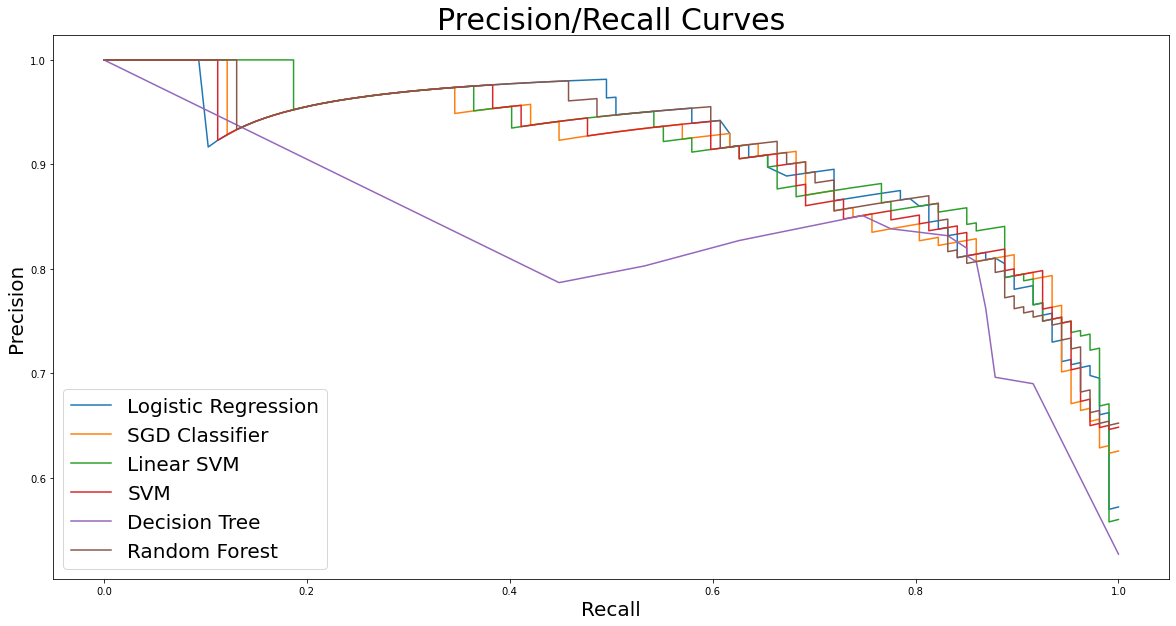

In [496]:
fig = plt.figure(figsize=(20, 10))
plt.plot(log_reg_recalls,log_reg_precisions,label="Logistic Regression")
plt.plot(sgd_recalls,sgd_precisions,label="SGD Classifier")
plt.plot(lin_svm_recalls,lin_svm_precisions,label="Linear SVM")
plt.plot(svm_recalls,svm_precisions,label="SVM")
plt.plot(tree_recalls,tree_precisions,label="Decision Tree")
plt.plot(ran_for_recalls,ran_for_precisions,label="Random Forest")
plt.legend(fontsize=20)
plt.title('Precision/Recall Curves',fontsize=30)
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.show()

Its hard to say from these plots alone which model is best. We can easily rule out the decision tree model. The Linear SVM looks good but so do Logistic Regression and Random Forest.

In [512]:
def plot_roc_curve(y_actual,y_pred,label=None):
    fpr,tpr, threshold = roc_curve(y_actual,y_pred)
    plt.plot(fpr,tpr,linewidth=2, label=label)

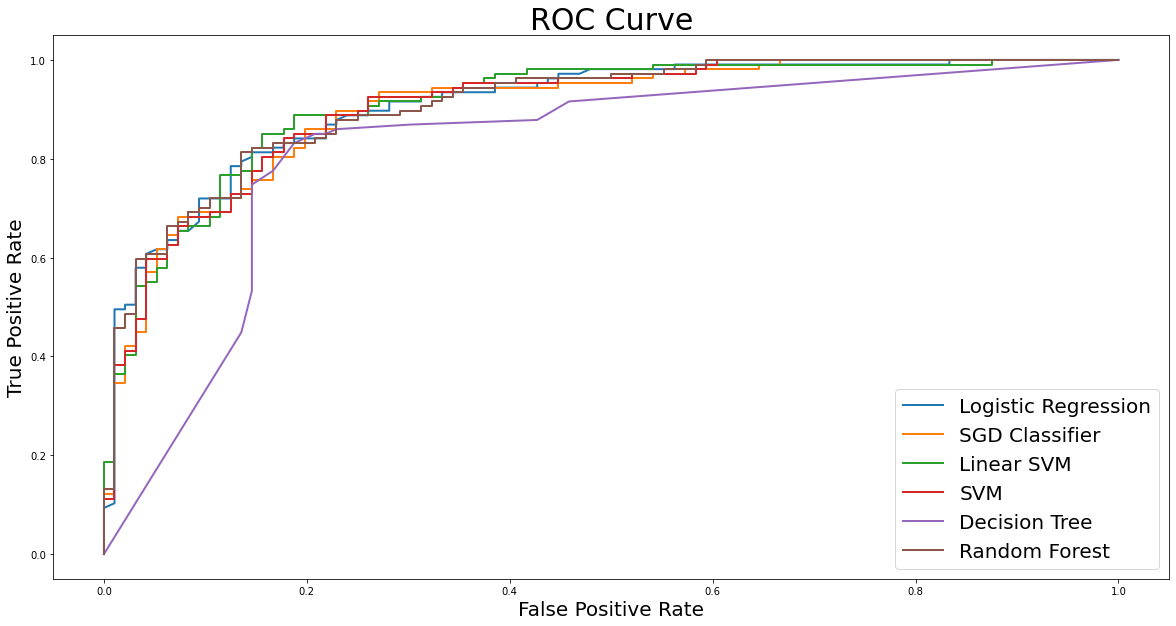

In [513]:
fig = plt.figure(figsize=(20, 10))
plot_roc_curve(y_train,log_reg_scores,label="Logistic Regression")
plot_roc_curve(y_train,sgd_scores,label="SGD Classifier")
plot_roc_curve(y_train,lin_svm_scores,label="Linear SVM")
plot_roc_curve(y_train,svm_scores,label="SVM")
plot_roc_curve(y_train,tree_scores,label="Decision Tree")
plot_roc_curve(y_train,ran_for_scores,label="Random Forest")
plt.legend(fontsize=20)
plt.title('ROC Curve',fontsize=30)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.show()

Since the positive class is NOT rare and we prioritise minimising false negatives, we should favour the ROC curve over Precision/Recall. Their insights are very similar though: we should reject the Decision Tree model. It seems that the Linear SVM model is a good fit, this is confirmed if we look at the ROC AUC metric.

In [514]:
auc = [roc_auc_score(y_train,log_reg_scores),
       roc_auc_score(y_train,sgd_scores),
       roc_auc_score(y_train,lin_svm_scores),
       roc_auc_score(y_train,svm_scores),
       roc_auc_score(y_train,tree_scores),
       roc_auc_score(y_train,ran_for_scores)]
new_prec_recall['ROC_AUC'] = auc

In [515]:
new_prec_recall

,model,new_precision,new_recall,precision,recall,diff_precision,diff_recall,precision_90,recall_90,ROC_AUC
0,LogisticRegression(),0.830258,0.859740,0.848509,0.916017,-0.018251,-0.056277,0.782258,0.906542,0.908538
1,SGDClassifier(),0.809702,0.805628,0.543333,0.348052,0.266369,0.457576,0.795082,0.906542,0.902064
2,LinearSVC(),0.835132,0.887879,0.703111,0.934199,0.132022,-0.046320,0.788618,0.906542,0.910144
3,SVC(),0.849596,0.850649,0.603482,0.869264,0.246113,-0.018615,0.795082,0.906542,0.905276
4,DecisionTreeClassifier(max_depth=3),0.749030,0.915584,0.746649,0.906061,0.002381,0.009524,0.690141,0.915888,0.822576
5,RandomForestClassifier(),0.838051,0.822078,0.827257,0.831602,0.010794,-0.009524,0.757812,0.906542,0.908684


# Summary

It look like either of the Support Vector Machines are the best models, considering the level of precision preserved at the 90% recall level and the ROC_AOC value. The SVM with a Polynomial kernel preserves the highest level of precision with a 90% recall, whilst the Linear SVM has the highest ROC_AUC value so might be a better choice for different thresholds.

In [518]:
X_test_proc = pd.get_dummies(X_test,columns=['restecg','thal','slope','cp'],drop_first=False)
test_scaler = MinMaxScaler()
X_test_proc[['age','trestbps','chol','thalach','oldpeak','ca']] = test_scaler.fit_transform(X_test[['age','trestbps','chol','thalach','oldpeak','ca']])

In [531]:
lin_svm_test_scores = final_lin_svm.decision_function(X_test_proc)
svm_test_scores = final_svm.decision_function(X_test_proc)
test_lin_svm_pred_90 = lin_svm_test_scores >= lin_svm_threshold_90_recall
test_svm_pred_90 = svm_test_scores >= svm_threshold_90_recall

In [535]:
confusion_matrix(y_test,test_lin_svm_pred_90)

array([[31, 11],
       [ 7, 51]], dtype=int64)

In [536]:
confusion_matrix(y_test,test_svm_pred_90)

array([[34,  8],
       [10, 48]], dtype=int64)

In [534]:
print(classification_report(y_test,test_lin_svm_pred_90))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.82      0.88      0.85        58

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



In [540]:
print(classification_report(y_test,test_svm_pred_90))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.86      0.83      0.84        58

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



For feature importances, we use the built-in Random Forest attribute.

In [541]:
final_ran_for.feature_importances_

array([0.02781203, 0.02785984, 0.01979876, 0.02432626, 0.00475121,
       0.07174098, 0.06383249, 0.0863827 , 0.18056975, 0.00358114,
       0.00331701, 0.00060738, 0.        , 0.00814455, 0.11513529,
       0.10016868, 0.00120298, 0.03071968, 0.04555371, 0.13755993,
       0.00214519, 0.04210007, 0.00269037])

In [543]:
means = []
big_index = 0
for index,count in enumerate(X_train.describe().loc['unique']):
    means.append(np.mean(opt_rnd_hot.feature_importances_[big_index:big_index+count]))
    big_index+=count

KeyError: 'unique'